In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

In [3]:
mnist=fetch_openml('mnist_784')
x,y=mnist['data'],mnist['target']#mnist contains data and target and we put data in x and target in y
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

<function matplotlib.pyplot.show(close=None, block=None)>

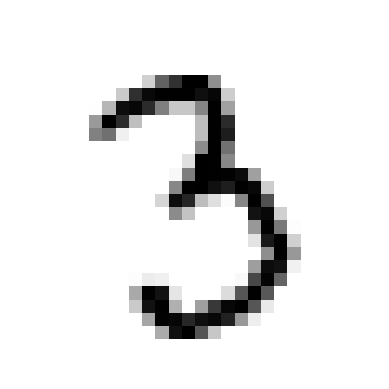

In [5]:
import matplotlib.cm


some_digit=x.to_numpy()[30000]
some_digit_image=some_digit.reshape(28,28)#reshape to a 28*28 grid
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='Nearest')
plt.axis("off")
plt.show

In [6]:
y[30000]

'3'

In [7]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

shuffled_index = np.random.permutation(60000)  # Generate shuffled indices

# Use .iloc to reorder the rows based on shuffled_index
x_train = x_train.iloc[shuffled_index]
y_train = y_train.iloc[shuffled_index]


##creating a 3 detector


In [8]:

y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_3=(y_train==3)
y_test_3=(y_test==3)

In [12]:
from sklearn.linear_model import LogisticRegression

# Assuming y_train_3 is defined, and it indicates whether each label in y_train is the digit 3
clarification = LogisticRegression(tol=0.1, solver='lbfgs')
clarification.fit(x_train, y_train_3)

# Assuming some_digit is a valid input (a feature vector)
val = clarification.predict([some_digit])
print(val)


[ True]


c:\Users\Shashank\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.model_selection import cross_val_score

# Evaluate model with cross-validation and accuracy scoring
accuracy_scores = cross_val_score(clarification, x_train, y_train_3, cv=3, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.97185
